# Gambler's Problem
Given a winning target $T > 0$, and probability of heads $0 < p_h < 1$, use value iteration to find an optimal policy along with its converged value function.

In [16]:
import matplotlib.pyplot as plt
from gamblers_problem import solve_gamblers_problem_value_iteration
import numpy as np
from typing import List
from matplotlib.ticker import MaxNLocator

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
TARGET = 100

In [18]:
ph_04_policy, ph_04_value_fns = solve_gamblers_problem_value_iteration(target=TARGET, p_h=0.4)

At iter_idx=10; delta=np.float64(3.041038172160032e-05)
Ending value iteration due to convergence; iter_idx=15, delta=np.float64(5.230363003816407e-09)


In [19]:
ph_025_policy, ph_025_value_fns = solve_gamblers_problem_value_iteration(target=TARGET, p_h=0.25)

At iter_idx=10; delta=np.float64(1.3578683137893677e-06)
Ending value iteration due to convergence; iter_idx=13, delta=np.float64(6.713094080623705e-09)


In [20]:
ph_055_policy, ph_055_value_fns = solve_gamblers_problem_value_iteration(target=TARGET, p_h=0.55, max_iter=10000)

At iter_idx=10; delta=np.float64(0.009579907118642927)
At iter_idx=20; delta=np.float64(0.0064741073332332255)
At iter_idx=30; delta=np.float64(0.0052219727380217185)
At iter_idx=40; delta=np.float64(0.004478074048961611)
At iter_idx=50; delta=np.float64(0.003955918745413456)
At iter_idx=60; delta=np.float64(0.0035804879356688968)
At iter_idx=70; delta=np.float64(0.003278471651713022)
At iter_idx=80; delta=np.float64(0.0030182278822915576)
At iter_idx=90; delta=np.float64(0.002811121407414463)
At iter_idx=100; delta=np.float64(0.002640581570113265)
At iter_idx=110; delta=np.float64(0.002476090942286402)
At iter_idx=120; delta=np.float64(0.0023186396604346626)
At iter_idx=130; delta=np.float64(0.0021687833292513004)
At iter_idx=140; delta=np.float64(0.0020264994648349077)
At iter_idx=150; delta=np.float64(0.0018914551327537943)
At iter_idx=160; delta=np.float64(0.0017632753939538226)
At iter_idx=170; delta=np.float64(0.001642148110535091)
At iter_idx=180; delta=np.float64(0.001528072944

In [21]:
def plot_value_iteration_progress(value_fns: List[np.ndarray], p_h: float):
    """
    Plot the progression of value iteration sweeps.

    Parameters
    ----------
    value_fns : list of 1D numpy arrays
        Sequence of value function estimates from value iteration.
    p_h : float
        Probability parameter for the title.
    """
    assert len(value_fns) >= 4, "value_fns must have at least 4 elements."

    sweeps_to_plot = [0, 1, 2, -1]
    labels = ["sweep 1", "sweep 2", "sweep 3", "final"]

    plt.figure(figsize=(8,6))
    for idx, label in zip(sweeps_to_plot, labels):
        plt.plot(value_fns[idx], label=label)

    plt.xlabel("Capital")
    plt.ylabel("Value Estimates")
    plt.title(f"Value Iteration Progressions for p_h={p_h}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

In [28]:
def plot_policy(policy: np.ndarray, p_h: float):
    """
    Plot a single policy as a function of capital (indices on x, actions on y).

    Parameters
    ----------
    policy : np.ndarray
        1D array representing the policy.
    p_h : float
        Probability parameter for the title.
    """
    assert policy.ndim == 1, "policy must be a 1D array."

    x = np.arange(1, len(policy) - 1)
    policy = policy[1:-1]

    plt.figure(figsize=(8,5))
    plt.plot(x, policy, marker="o", linestyle="-", label="policy")

    plt.xlabel("Capital")
    plt.ylabel("Final Policy (stake)")
    plt.title(f"Policy for p_h={p_h}")

    # Force integer ticks but limit how many show
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

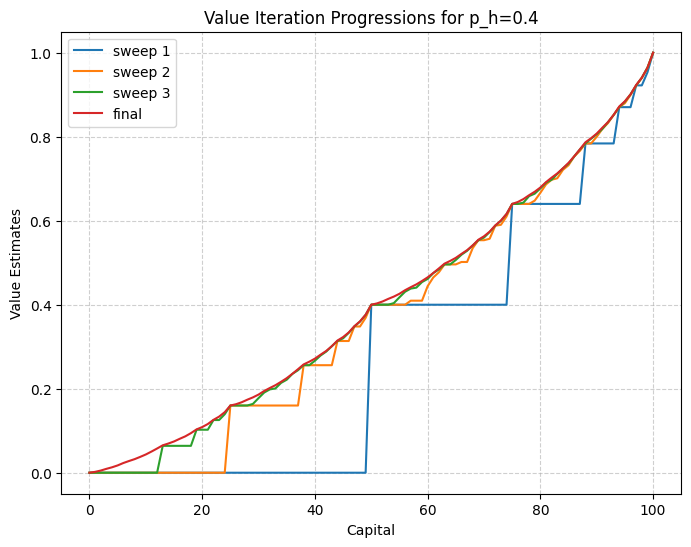

In [29]:
plot_value_iteration_progress(ph_04_value_fns, p_h=0.4)

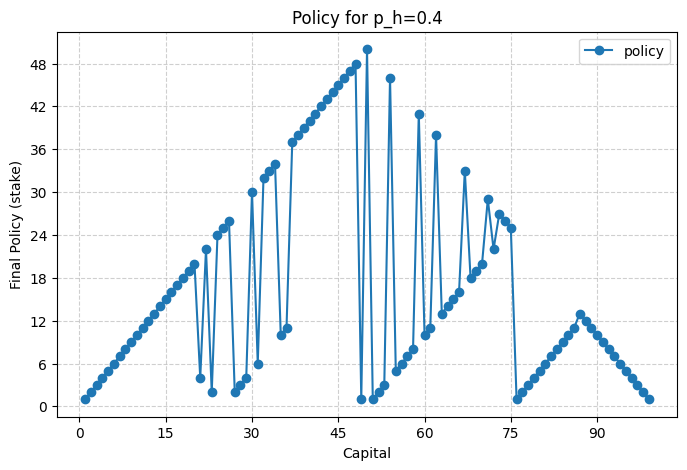

In [30]:
plot_policy(ph_04_policy, p_h=0.4)

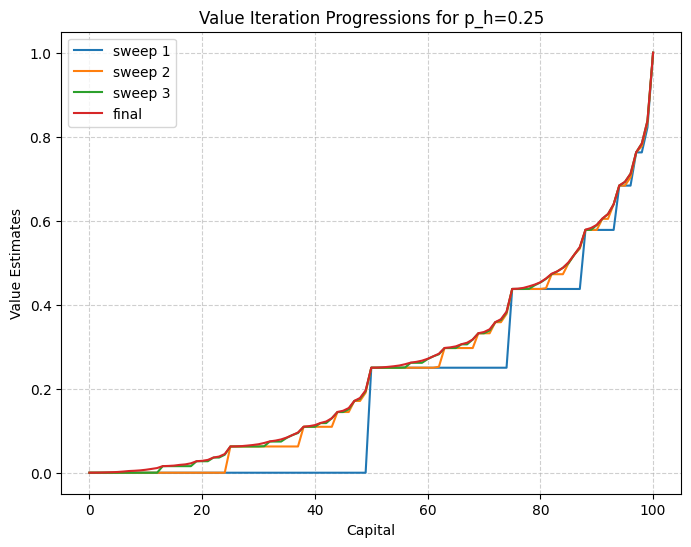

In [31]:
plot_value_iteration_progress(ph_025_value_fns, 0.25)

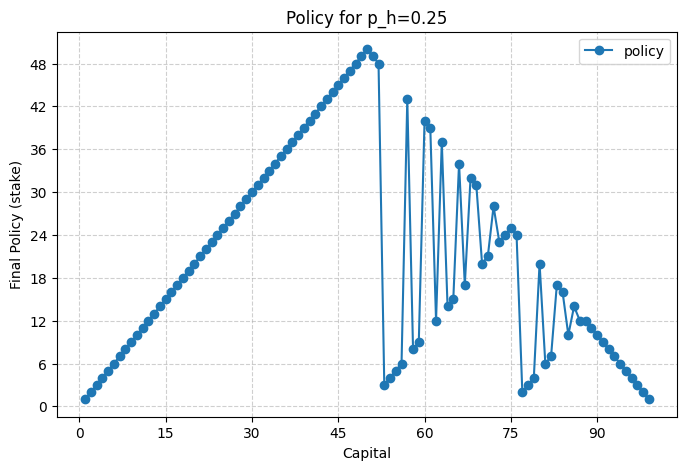

In [33]:
plot_policy(ph_025_policy, 0.25)

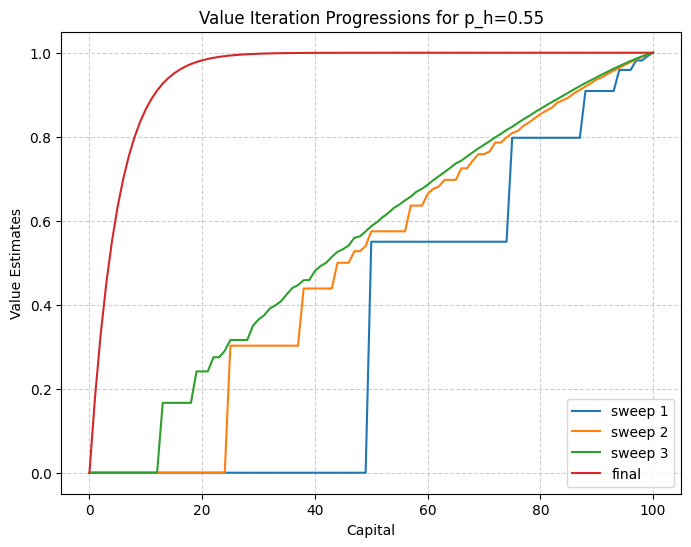

In [34]:
plot_value_iteration_progress(ph_055_value_fns, 0.55)

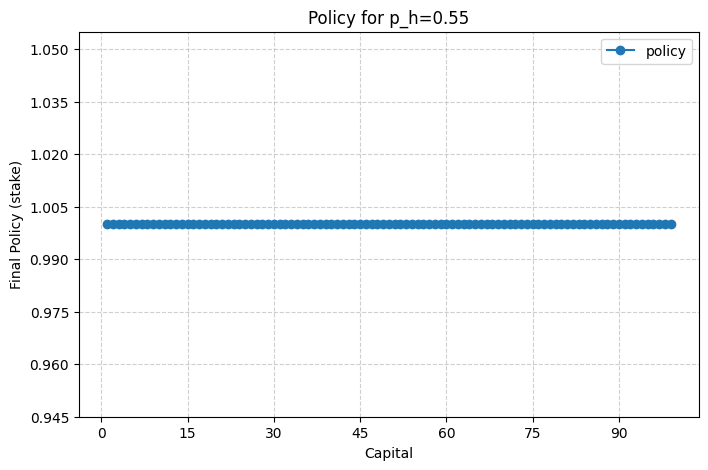

In [35]:
plot_policy(ph_055_policy, 0.55)